c:\Users\Prajwal Weladi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Model Performance:
Decision Tree: Train Acc = 1.00, Test Acc = 0.60
Pruned Decision Tree: Train Acc = 1.00, Test Acc = 0.60
Random Forest: Train Acc = 1.00, Test Acc = 0.60
AdaBoost: Train Acc = 1.00, Test Acc = 0.60

Confusion Matrix (Pruned Decision Tree):
[[1 1]
 [1 2]]

Classification Report (Pruned Decision Tree):
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



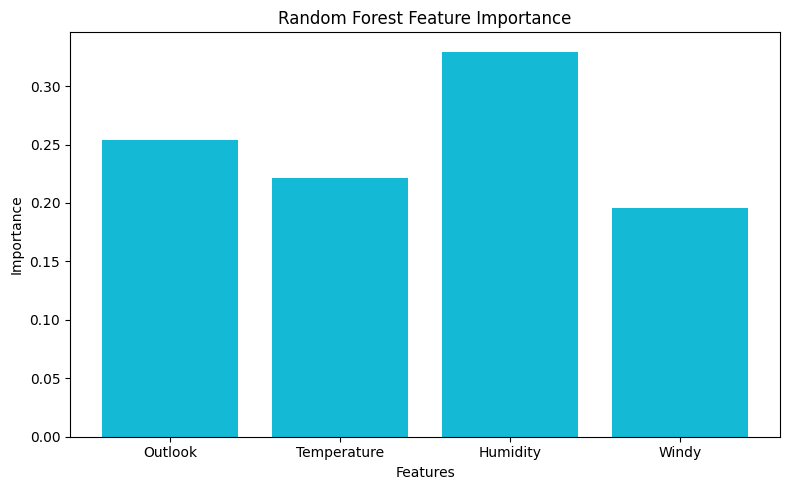

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('weather_forecast.csv')

# Encode categorical variables
le_dict = {}
for col in ['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Save label encoder for inverse transform if needed

# Define features and target
X = df.drop('Play', axis=1)
y = df['Play']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)

# 2. Cost Complexity Pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clf_pruned = GridSearchCV(DecisionTreeClassifier(random_state=42),
                          param_grid={'ccp_alpha': ccp_alphas}, cv=5)
clf_pruned.fit(X_train, y_train)
best_alpha = clf_pruned.best_params_['ccp_alpha']
clf_best = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_best.fit(X_train, y_train)
train_acc_pruned = clf_best.score(X_train, y_train)
test_acc_pruned = clf_best.score(X_test, y_test)

# 3. Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
train_acc_rf = rf_clf.score(X_train, y_train)
test_acc_rf = rf_clf.score(X_test, y_test)

# 4. AdaBoost with decision stumps
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
ada_clf.fit(X_train, y_train)
train_acc_ada = ada_clf.score(X_train, y_train)
test_acc_ada = ada_clf.score(X_test, y_test)

# Prepare results
results = {
    'Decision Tree': {'train_acc': train_acc, 'test_acc': test_acc},
    'Pruned Decision Tree': {'train_acc': train_acc_pruned, 'test_acc': test_acc_pruned},
    'Random Forest': {'train_acc': train_acc_rf, 'test_acc': test_acc_rf},
    'AdaBoost': {'train_acc': train_acc_ada, 'test_acc': test_acc_ada}
}

# Confusion matrix and classification report for best pruned tree
y_pred = clf_best.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Performance:")
for model, scores in results.items():
    print(f"{model}: Train Acc = {scores['train_acc']:.2f}, Test Acc = {scores['test_acc']:.2f}")

print("\nConfusion Matrix (Pruned Decision Tree):")
print(conf_matrix)
print("\nClassification Report (Pruned Decision Tree):")
print(class_report)

# Visualize feature importance from Random Forest
plt.figure(figsize=(8, 5))
plt.bar(range(X.shape[1]), rf_clf.feature_importances_, align='center', color='#14b9d6')
plt.xticks(range(X.shape[1]), X.columns)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()
